In [1]:
from sklearn.svm import SVC
import sklearn.neural_network as nn
import sklearn.model_selection
import sklearn.metrics as metrics
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784') 

In [2]:
# Diviser la base de données en 70% pour l’apprentissage (training) et le reste pour les tests. 
trainsize=0.7
size=10000
data=np.random.randint(70000, size=size)
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
train_size=trainsize)

In [4]:
# EN se basant sur les fonctions usuelles :
# classifier = svm.SVC()
# classifier.fit()
# predicted = classifier.predict()
# Construire un modèle de classification ayant comme paramètres un noyau
# linear: clsvm = svm.SVC(kernel=’linear’). 
start=time.time()
clf = SVC(kernel='linear',gamma='scale')
clf.fit(xtrain, ytrain)
score=clf.score(xtest,ytest)
length=time.time()-start
print("Avec "+str(size)+" echantillons : Taux de réussite="+str(score)+", temps d'éxecution : "+str(length)+" secondes")

Avec 10000 echantillons : Taux de réussite=0.921, temps d'éxecution : 9.77307653427124 secondes


with kernel=linear, score=0.921, exec time=9.702046632766724
with kernel=poly, score=0.9506666666666667, exec time=15.000524520874023
with kernel=rbf, score=0.9606666666666667, exec time=16.511226654052734
with kernel=sigmoid, score=0.837, exec time=16.757350206375122


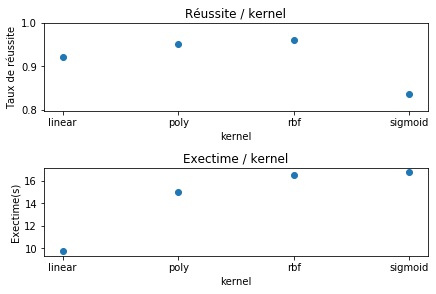

In [13]:
scores=[]
times=[]
for kernel in ('linear','poly','rbf','sigmoid'):
    start=time.time()
    clf = SVC(kernel=kernel,gamma='scale')
    clf.fit(xtrain, ytrain)
    score=clf.score(xtest,ytest)
    scores.append(score)
    length=time.time()-start
    times.append(length)
    print("with kernel="+str(kernel)+", score="+str(score)+", exec time="+str(length))
plt.subplot(2,1,1)
plt.scatter(('linear','poly','rbf','sigmoid'),scores)
plt.title("Réussite / kernel")
plt.xlabel("kernel")
plt.ylabel("Taux de réussite")
plt.subplot(2,1,2)
plt.scatter(('linear','poly','rbf','sigmoid'),times)
plt.title("Exectime / kernel")
plt.xlabel("kernel")
plt.ylabel("Exectime(s)")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

with C =0.1, scoretest=0.9233333333333333
with C =0.1, scoretrain=0.9362857142857143
with C =0.25, scoretest=0.9393333333333334
with C =0.25, scoretrain=0.958
with C =0.5, scoretest=0.95
with C =0.5, scoretrain=0.972
with C =0.75, scoretest=0.9566666666666667
with C =0.75, scoretrain=0.9824285714285714
with C =1, scoretest=0.9606666666666667
with C =1, scoretrain=0.9867142857142858


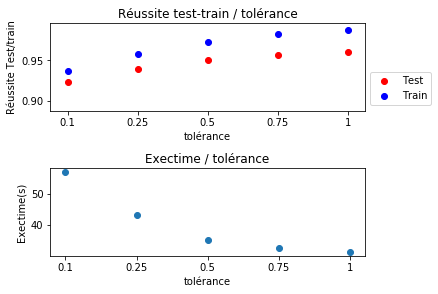

In [20]:
# erreur classification en fonction de C (sur les données de test et d'entrainement)
scoretest=[]
scoretrain=[]
times=[]
for i in [0.1,0.25,0.5,0.75,1]:
    start=time.time()
    clf = SVC(C=i,gamma='scale')
    clf.fit(xtrain, ytrain)
    tempscore=clf.score(xtest,ytest)
    scoretest.append(tempscore)
    print("with C ="+str(i)+", scoretest="+str(tempscore))
    tempscore=clf.score(xtrain,ytrain)
    scoretrain.append(tempscore)
    print("with C ="+str(i)+", scoretrain="+str(tempscore))
    length=time.time()-start
    times.append(length)
plt.subplot(2,1,1)
plt.scatter(('0.1','0.25','0.5','0.75','1'),scoretest,c='r',label='Test')
plt.title("Réussite test-train / tolérance")
plt.xlabel("tolérance")
plt.ylabel("Réussite Test/train")
plt.scatter(('0.1','0.25','0.5','0.75','1'),scoretrain,c='b',label='Train')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.subplot(2,1,2)
plt.scatter(('0.1','0.25','0.5','0.75','1'),times)
plt.title("Exectime / tolérance")
plt.xlabel("tolérance")
plt.ylabel("Exectime(s)")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [21]:
## matrice de confusion
metrics.confusion_matrix(ytest,clf.predict(xtest))

array([[293,   0,   0,   0,   0,   2,   1,   0,   1,   0],
       [  0, 300,   1,   1,   0,   1,   0,   0,   0,   0],
       [  1,   1, 297,   1,   3,   0,   2,   1,   3,   1],
       [  0,   1,   6, 274,   0,   4,   2,   1,   2,   0],
       [  1,   0,   0,   0, 282,   0,   3,   1,   1,   6],
       [  0,   0,   1,   7,   5, 259,   4,   0,   3,   1],
       [  1,   0,   0,   0,   0,   2, 317,   0,   0,   0],
       [  1,   3,   2,   1,   1,   0,   0, 328,   0,  10],
       [  0,   1,   2,   4,   1,   4,   1,   0, 266,   1],
       [  0,   0,   1,   1,   5,   1,   0,   5,   1, 266]])